<a href="https://colab.research.google.com/github/Abdulrahman-Mohamed/heart-rate-signals-classification/blob/main/heart_rate_clasification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 5.5MB/s 


In [ ]:

import os

from pyunpack import Archive
os.mkdir('/content/dataset')

Archive('/content/drive/MyDrive/Colab Notebooks/datasets for colab/current.rar').extractall('/content/dataset')


In [ ]:
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
import seaborn as sns

import random
import pandas as pd
import torch

import sklearn

import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.layers.merge import concatenate

In [ ]:
mit_train_df = pd.read_csv("/content/dataset/mitbih_train.csv", header=None)
mit_test_df = pd.read_csv("/content/dataset/mitbih_test.csv", header=None)

print(mit_train_df.shape)
print(mit_test_df.shape)

(87554, 188)
(21892, 188)


In [ ]:
mit_df=pd.concat([mit_train_df, mit_test_df], axis=0)
mit_df.shape

(109446, 188)

In [ ]:
print(mit_df[mit_df.columns[-1]].unique())


[0. 1. 2. 3. 4.]


In [ ]:
train_classes={0:"N",
            1:"S",
            2:"V",
            3:"F",
            4:"Q",
            5:"M"}

In [ ]:
print(mit_df[mit_df.columns[-1]].unique())

[0. 1. 2. 3. 4.]


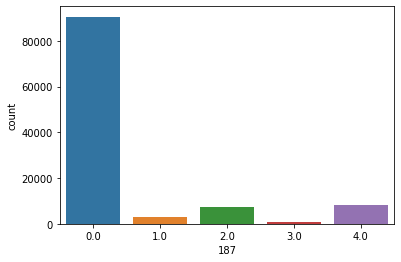

In [ ]:
sns.countplot(x=187, data = mit_df) 

In [ ]:
class_1 = mit_df[mit_df[187]==1.0]
class_2 = mit_df[mit_df[187]==2.0]
class_3 = mit_df[mit_df[187]==3.0]
class_4 = mit_df[mit_df[187]==4.0]
class_0 = mit_df[mit_df[187]==0.0].sample(n = 8000)
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
45804,0.903614,0.662651,0.173494,0.000000,0.048193,0.074699,0.038554,0.009639,0.024096,0.031325,0.031325,0.026506,0.033735,0.043373,0.031325,0.040964,0.043373,0.048193,0.065060,0.055422,0.055422,0.077108,0.077108,0.077108,0.101205,0.101205,0.089157,0.101205,0.106024,0.132530,0.120482,0.106024,0.125301,0.149398,0.144578,0.134940,0.151807,0.161446,0.161446,0.151807,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36448,1.000000,0.666667,0.000000,0.099415,0.097466,0.146199,0.167641,0.171540,0.169591,0.175439,0.179337,0.181287,0.181287,0.183236,0.191033,0.187135,0.194932,0.198830,0.198830,0.202729,0.208577,0.208577,0.212476,0.224172,0.228070,0.241715,0.249513,0.259259,0.269006,0.284600,0.304094,0.315789,0.341131,0.364522,0.395712,0.421053,0.448343,0.479532,0.508772,0.536062,...,0.181287,0.189084,0.189084,0.191033,0.194932,0.198830,0.200780,0.214425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14136,0.000000,0.191176,0.320588,0.426471,0.491176,0.494118,0.491176,0.488235,0.502941,0.532353,0.523529,0.517647,0.523529,0.544118,0.541176,0.535294,0.552941,0.558824,0.555882,0.558824,0.582353,0.608824,0.620588,0.620588,0.650000,0.679412,0.691176,0.726471,0.761765,0.794118,0.808824,0.817647,0.847059,0.864706,0.873529,0.841176,0.826471,0.808824,0.747059,0.676471,...,0.550000,0.552941,0.550000,0.555882,0.561765,0.582353,0.585294,0.576471,0.588235,0.614706,0.629412,0.629412,0.644118,0.682353,0.702941,0.720588,0.752941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3548,1.000000,0.759124,0.558394,0.259124,0.091241,0.069343,0.149635,0.164234,0.178832,0.178832,0.178832,0.149635,0.189781,0.164234,0.204380,0.189781,0.215328,0.218978,0.255474,0.255474,0.288321,0.302920,0.328467,0.332117,0.350365,0.364964,0.434307,0.441606,0.492701,0.510949,0.540146,0.485401,0.467153,0.364964,0.343066,0.306569,0.310219,0.266423,0.281022,0.259124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40581,1.000000,0.846774,0.645161,0.432796,0.309140,0.185484,0.099462,0.045699,0.021505,0.000000,0.021505,0.008065,0.018817,0.026882,0.040323,0.026882,0.032258,0.024194,0.029570,0.024194,0.032258,0.026882,0.021505,0.021505,0.040323,0.026882,0.053763,0.056452,0.088710,0.099462,0.129032,0.145161,0.177419,0.182796,0.212366,0.209677,0.215054,0.193548,0.188172,0.177419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


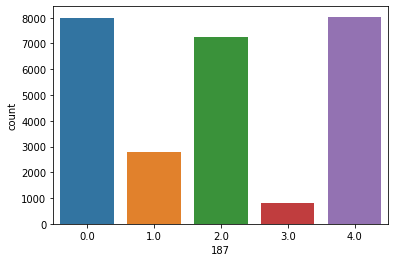

In [ ]:
sns.countplot(x=187, data = new_df) 

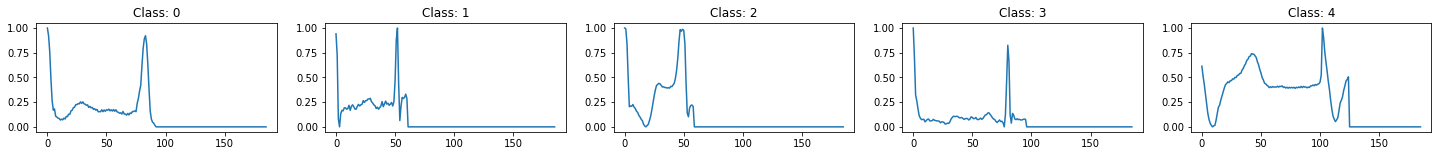

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(new_df[new_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))

In [ ]:
from sklearn.model_selection import train_test_split
mit_df=pd.concat([mit_train_df, mit_test_df], axis=0)

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)


X_train.shape,y_train.shape

((24171, 187, 1), (24171, 5))

In [ ]:
clf = Sequential()

clf.add(Conv1D(filters=64, kernel_size=(11,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
clf.add(BatchNormalization())
clf.add(MaxPool1D(pool_size=(2,), strides=2, padding='same'))
clf.add(Conv1D(filters=256, kernel_size=(5,), padding='same', activation='relu')) 
clf.add(Dropout(0.5))

clf.add(MaxPool1D(pool_size=(2,), strides=2, padding='same'))
clf.add(Conv1D(filters=384, kernel_size=(3,), padding='same', activation='relu'))  
clf.add(Dropout(0.5))

clf.add(Conv1D(filters=256, kernel_size=(3,), padding='same', activation='relu'))  
clf.add(MaxPool1D(pool_size=(2,), strides=2, padding='same'))
clf.add(Dropout(0.5))

clf.add(BatchNormalization())

clf.add(Flatten())

clf.add(Dense(units = 50, activation='relu'))
clf.add(Dropout(0.5))

clf.add(Dense(units = 50, activation='relu'))
clf.add(Dropout(0.5))


clf.add(Dense(units = 5, activation='softmax'))

In [ ]:
from tensorflow import keras


In [ ]:
opt = keras.optimizers.Adam(0.001)
clf.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
clf.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 187, 64)           768       
_________________________________________________________________
batch_normalization_17 (Batc (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 94, 64)            0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 94, 256)           82176     
_________________________________________________________________
dropout_33 (Dropout)         (None, 94, 256)           0         
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 47, 256)           0         
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 47, 384)         

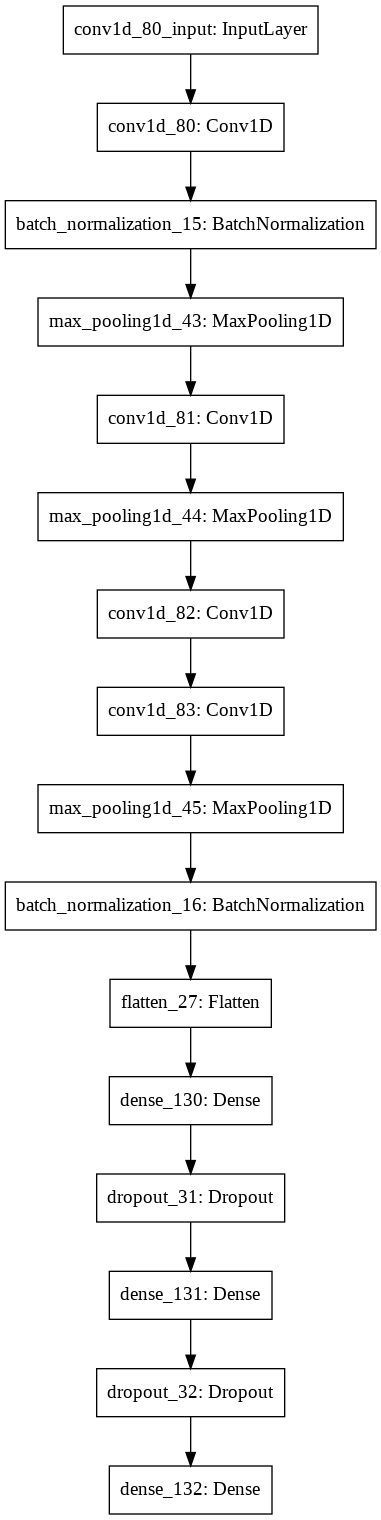

In [ ]:
plot_model(clf)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='min')
mcp_save = ModelCheckpoint(r'/content/first.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=20, min_lr=0.0001)
cnn_history = clf.fit(X_train,y_train,epochs=50,batch_size=16,validation_split=0.33,callbacks=[earlyStopping, mcp_save, reduce_lr]
                  ,validation_steps=10, verbose=1)

Epoch 1/50
1013/1013 [==============================] - 8s 7ms/step - loss: 1.3264 - accuracy: 0.5006 - val_loss: 0.9558 - val_accuracy: 0.6812
Epoch 2/50
1013/1013 [==============================] - 7s 6ms/step - loss: 0.7156 - accuracy: 0.7467 - val_loss: 0.5950 - val_accuracy: 0.8375
Epoch 3/50
1013/1013 [==============================] - 6s 6ms/step - loss: 0.6040 - accuracy: 0.7924 - val_loss: 0.4899 - val_accuracy: 0.8687
Epoch 4/50
1013/1013 [==============================] - 7s 7ms/step - loss: 0.5080 - accuracy: 0.8271 - val_loss: 0.3931 - val_accuracy: 0.8687
Epoch 5/50
1013/1013 [==============================] - 6s 6ms/step - loss: 0.4642 - accuracy: 0.8471 - val_loss: 0.4076 - val_accuracy: 0.8813
Epoch 6/50
1013/1013 [==============================] - 6s 6ms/step - loss: 0.4295 - accuracy: 0.8578 - val_loss: 0.3699 - val_accuracy: 0.8813
Epoch 7/50
1013/1013 [==============================] - 6s 6ms/step - loss: 0.3932 - accuracy: 0.8652 - val_loss: 0.3497 - val_accuracy:

In [ ]:
loss, accuracy = clf.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training loss: {:.4f}".format(loss))
loss, accuracy = clf.evaluate(X_test, y_test, verbose=False,batch_size=128)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing loss:  {:.4f}".format(loss))


Training Accuracy: 0.9596
Training loss: 0.1299
Testing Accuracy:  0.9516
Testing loss:  0.1600


Text(0, 0.5, 'Accuracy')

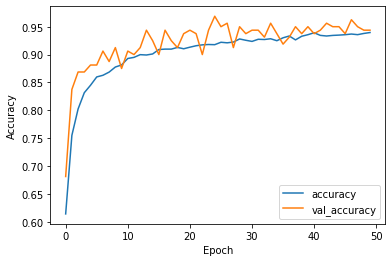

In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

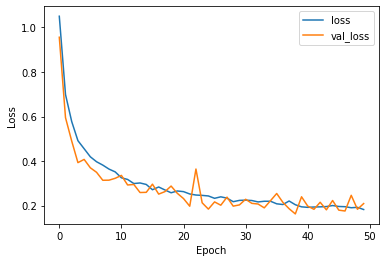

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
yhat_classes = clf.predict_classes(X_test, verbose=0)
print(yhat_classes.shape,y_train.shape)
print(yhat_classes[60])

# reduce to 1d array
yhat_classes = yhat_classes[:]
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
print(rounded_labels[60])

from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()

print(classification_report(rounded_labels,yhat_classes))
print("Time taken to predict the model " + str(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(2686,) (24171, 5)
0
1
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       799
           1       0.98      0.78      0.87       290
           2       0.95      0.98      0.97       709
           3       0.72      0.82      0.76        77
           4       1.00      0.99      0.99       811

    accuracy                           0.95      2686
   macro avg       0.91      0.91      0.91      2686
weighted avg       0.95      0.95      0.95      2686

Time taken to predict the model 0.006882429122924805


In [ ]:
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],1)))
ann_model.add(Dropout(0.5))

ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.5))

ann_model.add(Flatten())
ann_model.add(Dense(5, activation='softmax'))

In [ ]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 187, 64)           128       
_________________________________________________________________
dropout (Dropout)            (None, 187, 64)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 187, 32)           2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 187, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 5984)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 29925     
Total params: 32,133
Trainable params: 32,133
Non-trainable params: 0
__________________________________________________

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='min')
mcp_save = ModelCheckpoint(r'/content/second.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=20, min_lr=0.0001)
ann_history = ann_model.fit(X_train,y_train,epochs=50,batch_size=16,validation_split=0.33,callbacks=[earlyStopping, mcp_save, reduce_lr]
                  ,validation_steps=20, verbose=1)

Epoch 1/50
1013/1013 [==============================] - 6s 3ms/step - loss: 0.9455 - accuracy: 0.6323 - val_loss: 0.5385 - val_accuracy: 0.8313
Epoch 2/50
1013/1013 [==============================] - 3s 3ms/step - loss: 0.6144 - accuracy: 0.7875 - val_loss: 0.4441 - val_accuracy: 0.8750
Epoch 3/50
1013/1013 [==============================] - 3s 3ms/step - loss: 0.5298 - accuracy: 0.8205 - val_loss: 0.4128 - val_accuracy: 0.8719
Epoch 4/50
1013/1013 [==============================] - 3s 3ms/step - loss: 0.5209 - accuracy: 0.8254 - val_loss: 0.3985 - val_accuracy: 0.8844
Epoch 5/50
1013/1013 [==============================] - 3s 3ms/step - loss: 0.4967 - accuracy: 0.8279 - val_loss: 0.3831 - val_accuracy: 0.8844
Epoch 6/50
1013/1013 [==============================] - 3s 3ms/step - loss: 0.4865 - accuracy: 0.8305 - val_loss: 0.3714 - val_accuracy: 0.8875
Epoch 7/50
1013/1013 [==============================] - 3s 3ms/step - loss: 0.4695 - accuracy: 0.8389 - val_loss: 0.3678 - val_accuracy:

In [ ]:
loss, accuracy = ann_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training loss: {:.4f}".format(loss))
loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing loss:  {:.4f}".format(loss))

Training Accuracy: 0.8933
Training loss: 0.3176
Testing Accuracy:  0.8757
Testing loss:  0.3819


Text(0, 0.5, 'Accuracy')

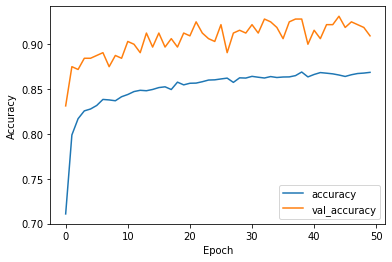

In [ ]:
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

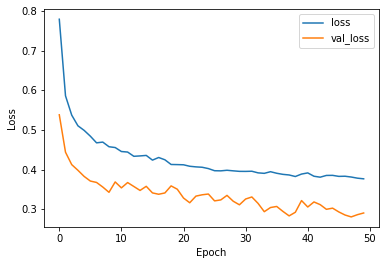

In [ ]:
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
yhat_classes = ann_model.predict_classes(X_test, verbose=0)
print(yhat_classes.shape,y_test.shape)

import numpy as np
rounded_labels=np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()

print(classification_report(rounded_labels,yhat_classes))
print("Time taken to predict the model " + str(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(2686,) (2686, 5)
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       773
           1       0.93      0.67      0.78       306
           2       0.90      0.86      0.88       696
           3       0.84      0.65      0.73        91
           4       0.97      0.95      0.96       820

    accuracy                           0.88      2686
   macro avg       0.88      0.81      0.84      2686
weighted avg       0.88      0.88      0.87      2686

Time taken to predict the model 0.006963968276977539


In [ ]:
X_train.shape,y_train.shape

((24171, 187, 1), (24171, 5))

In [ ]:
model = Sequential()

model.add(layers.Embedding(input_dim=187, output_dim=64))

model.add(layers.LSTM(64))
model.add(Dropout(0.5))
model.add(Flatten())

# Add a Dense layer with 10 units.
model.add(layers.Dense(40))
model.add(Dropout(0.5))

model.add(layers.Dense(5))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          11968     
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 40)                2600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)               

In [ ]:
opt = keras.optimizers.Adam(0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='min')
mcp_save = ModelCheckpoint(r'/content/second.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=20, min_lr=0.0001)
model_history = model.fit(X_train,y_train,epochs=50,batch_size=16,validation_split=0.33,callbacks=[earlyStopping, mcp_save, reduce_lr]
                  ,validation_steps=20, verbose=1)

Epoch 1/50
1013/1013 [==============================] - 11s 9ms/step - loss: 7.9329 - accuracy: 0.2769 - val_loss: 10.8293 - val_accuracy: 0.3000
Epoch 2/50
1013/1013 [==============================] - 9s 9ms/step - loss: 8.5836 - accuracy: 0.2890 - val_loss: 9.2679 - val_accuracy: 0.3000
Epoch 3/50
1013/1013 [==============================] - 9s 9ms/step - loss: 8.3541 - accuracy: 0.2595 - val_loss: 6.3969 - val_accuracy: 0.2750
Epoch 4/50
1013/1013 [==============================] - 9s 9ms/step - loss: 7.0956 - accuracy: 0.1561 - val_loss: 0.4030 - val_accuracy: 0.0250
Epoch 5/50
1013/1013 [==============================] - 9s 9ms/step - loss: 8.3109 - accuracy: 0.0304 - val_loss: 9.2679 - val_accuracy: 0.0250
Epoch 6/50
1013/1013 [==============================] - 9s 9ms/step - loss: 8.9431 - accuracy: 0.0449 - val_loss: 6.8502 - val_accuracy: 0.0250
Epoch 7/50
1013/1013 [==============================] - 9s 9ms/step - loss: 8.0575 - accuracy: 0.0593 - val_loss: 9.2679 - val_accurac

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing loss:  {:.4f}".format(loss))

Training Accuracy: 0.2990
Training loss: 9.1804
Testing Accuracy:  0.2878
Testing loss:  8.8151


Text(0, 0.5, 'Accuracy')

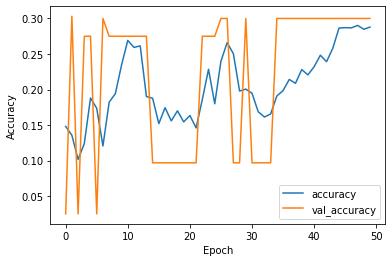

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

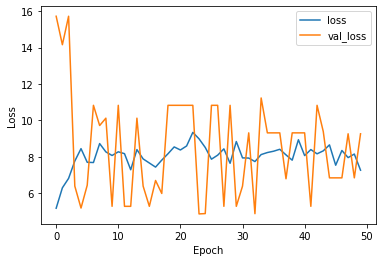

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes.shape,y_test.shape)

import numpy as np
rounded_labels=np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()

print(classification_report(rounded_labels,yhat_classes))
print("Time taken to predict the model " + str(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(2686,) (2686, 5)
              precision    recall  f1-score   support

           0       0.29      1.00      0.45       773
           1       0.00      0.00      0.00       306
           2       0.00      0.00      0.00       696
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00       820

    accuracy                           0.29      2686
   macro avg       0.06      0.20      0.09      2686
weighted avg       0.08      0.29      0.13      2686

Time taken to predict the model 0.006803989410400391


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
